In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import glob
from scipy.stats import linregress,norm
from scipy.optimize import curve_fit

In [2]:
def gaussian(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

In [3]:
shortreads = glob.glob('read/read_0.1_*')
datavalues =  np.zeros((len(shortreads),2532,3352))
i = 0
for file in shortreads:
    data = fits.getdata(file)
    datavalues[i,:,:] = data
    i+= 1
median = np.median(datavalues,axis=0)
std_array = np.std(datavalues,axis=0)
weight_std = np.std(std_array)/np.sqrt(2532*3352)
print(np.mean(std_array), np.median(std_array), np.std(std_array), np.std(std_array)/np.sqrt(2532*3352))

25.643429440804727 25.373411280314677 6.277960548660367 0.00215493773719924


25.24080010302446 6.195758513120832


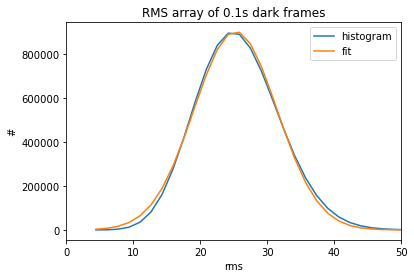

In [4]:
plt.figure()
n,edges = np.histogram(std_array,bins=800)
centers = (edges[:-1]+edges[1:])/2
pars, matrix = curve_fit(gaussian,centers,n,(8e5,26,6))
fit = gaussian(centers,*pars)
plt.plot(centers,n,label='histogram')
plt.plot(centers,fit,label='fit')
plt.legend()
plt.title('RMS array of 0.1s dark frames')
plt.xlabel('rms'); plt.ylabel('#')
plt.xlim(0,50)
print(pars[1],pars[2])
#plt.savefig('read/short_fit.png',dpi=300)

#mean,std = norm.fit(rms_array)
#print(mean,std)
#x = np.linspace(edges[0],edges[-1],200)
#y = norm.pdf(x,mean,std)
#y*= np.max(n)/max(y)
#plt.plot(x,y)

In [5]:
midreads = glob.glob('read/read_1_*')
datavalues =  np.zeros((len(midreads),2532,3352))
i = 0
for file in midreads:
    data = fits.getdata(file)
    datavalues[i,:,:] = data
    i+= 1
std_array = np.std(datavalues,axis=0)
print(np.mean(std_array), np.median(std_array), np.std(std_array), np.std(std_array)/np.sqrt(2532*3352))

20.08330819520603 18.83259585576738 10.952075253544182 0.0037593482917863247


17.90040983569858 10.965095338243996 0.0037638174934711216


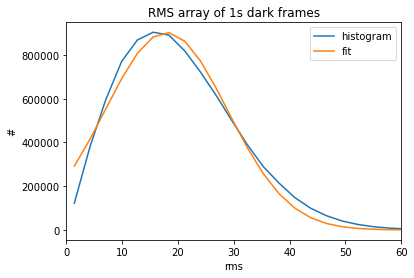

In [6]:
plt.figure()
n,edges = np.histogram(std_array,bins=3000)
centers = (edges[:-1]+edges[1:])/2
pars, matrix = curve_fit(gaussian,centers,n,(1e6,300,20))
fit = gaussian(centers,*pars)
plt.plot(centers,n,label='histogram')
plt.plot(centers,fit,label='fit')
plt.legend()
plt.title('RMS array of 1s dark frames')
plt.xlabel('rms'); plt.ylabel('#')
plt.xlim(0,60)
print(pars[1],pars[2],pars[2]/np.sqrt(2532*3352))
#plt.savefig('read/mid_fit.png',dpi=300)

In [7]:
longreads = glob.glob('read/read_10_*')
datavalues =  np.zeros((len(longreads),2532,3352))
i = 0
for file in longreads:
    data = fits.getdata(file)
    datavalues[i,:,:] = data
    i+= 1
std_array = np.std(datavalues,axis=0)
print(np.mean(std_array), np.median(std_array), np.std(std_array), np.std(std_array)/np.sqrt(2532*3352))

20.184339736715128 18.926759422104517 10.65684413907181 0.0036580089053979124


17.989198921655493 11.032003723010826 0.003786784092600174


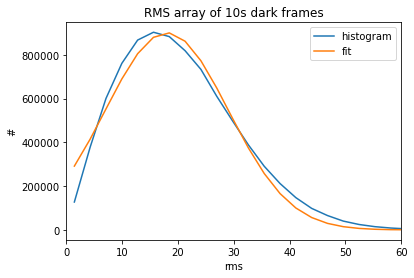

In [8]:
plt.figure()
n,edges = np.histogram(std_array,bins=400)
centers = (edges[:-1]+edges[1:])/2
pars, matrix = curve_fit(gaussian,centers,n,(1e6,20,6))
fit = gaussian(centers,*pars)
plt.plot(centers,n,label='histogram')
plt.plot(centers,fit,label='fit')
plt.legend()
plt.title('RMS array of 10s dark frames')
plt.xlabel('rms'); plt.ylabel('#')
plt.xlim(0,60)
print(pars[1],pars[2],pars[2]/np.sqrt(2532*3352))
#plt.savefig('read/long_fit.png',dpi=300)

In [9]:
int_files = ['int/int_0.fits','int/int_1.fits','int/int_2.fits','int/int_3.fits',
             'int/int_4.fits','int/int_5.fits','int/int_6.fits']
medians = []
for file in int_files:
    f = fits.open(file)
    medians.append(np.median(f[0].data))
    f.close()
print(medians)

[1036.0, 1036.0, 1037.0, 1038.0, 1037.0, 1033.0, 1036.0]


In [10]:
def line_fit(x,m,b):
    return m*x+b

In [18]:
dark_files = ['dark/dark_0.2.fits','dark/dark_1.fits','dark/dark_5.fits',
              'dark/dark_25.fits','dark/dark_125.fits','dark/dark_500.fits']
exptimes = np.array((0.2,1,5,25,125,500))
fit_means = []
fit_sigmas = []
for file in dark_files:
    data = fits.getdata(file)
    mean,std = norm.fit(data)
    fit_means.append(mean); fit_sigmas.append(std)
    f.close()
fit_means = np.array(fit_means)
fit_sigmas = np.array(fit_sigmas)
m,b,r,p,stderr = linregress(exptimes,fit_means)
print(m)
s = np.sqrt(np.sum(fit_means)**2/np.sum(exptimes)**2-np.sum(exptimes*fit_means)**2/np.sum(exptimes)**4)/np.sqrt(4)
print(s)
chi_squared_1 = np.sum(((fit_means-line_fit(exptimes,m+0.000008,b))/0.004)**2)
print(chi_squared_1)
chi_squared_2 = np.sum(((fit_means-line_fit(exptimes,m+0.009,b))/s)**2)
print(chi_squared_2)

0.10502716852051186
4.718577118347128
1050585.9723245613
1.7236815373192353


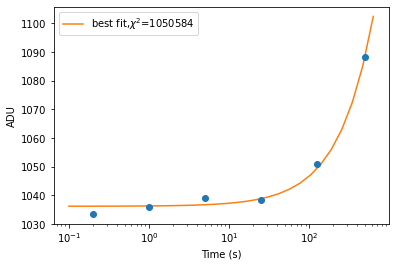

In [12]:
plt.figure()
time = np.logspace(-1,2.8,30); y = time*(m)+b
#plt.plot(exptimes,fit_means,'o')
plt.errorbar(exptimes,fit_means,yerr=weight_std,fmt='o')
plt.plot(time,y,label=f'best fit,$\chi^{2}$={int(chi_squared_1)}')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('ADU')
plt.xscale('log')
#plt.savefig('dark/dark.png',dpi=300)

6.096137539345225
14.414857845889715


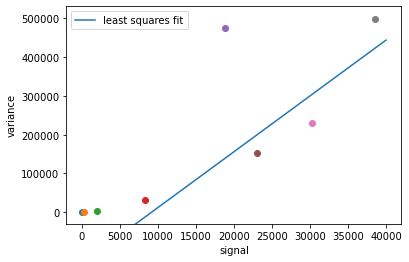

In [21]:
datatimes = [0.1,1,5,20,45,60,80,100]
plt.figure()
xp = []; yp = [];
for time in datatimes:
    files = glob.glob(f'gain/gain_{time}_*')
    mean = np.zeros((2532,3352))
    rms = np.zeros((2532,3352))
    for file in files:
        f = fits.open(file)
        mean+= f[0].data-median
        rms+= (f[0].data-median)**2
        f.close()
    mean/= len(files)
    var = rms/len(files)-mean**2
    plt.scatter(np.median(mean),np.median(var))
    if (time > 5) and (time != 45):
        xp.append(np.median(mean)); yp.append(np.median(var))
xp = np.array(xp); yp = np.array(yp)
xx = xp**2; xy = xp*yp
s = np.sqrt(np.sum(yp)**2/np.sum(xp)**2-np.sum(xy)**2/np.sum(xp)**4)/np.sqrt(2)
print(s)
x = np.linspace(0,4e4,10)
m = (4*np.sum(xy)-np.sum(xp)*np.sum(yp))/(4*np.sum(xx)-np.sum(xp)**2)
b = (np.sum(yp)-m*np.sum(xp))/4
y = m*x+b
print(m)
plt.plot(x,y,label='least squares fit')
plt.xlabel('signal'); plt.ylabel('variance')
plt.ylim(-3e4)
plt.legend()
plt.savefig(f'gain/gain_4.png',dpi=300)

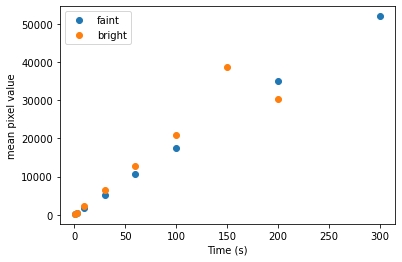

In [14]:
darktimes = np.array((1,3,10,30,60,100,200,300))
lighttimes = np.array((1,3,10,30,60,100,150,200))
darkmedians = []
lightmedians = []
for time in darktimes:
    f = fits.open(f'lin/lin_faint_{time}.fits')
    darkmedians.append(np.median(f[0].data-median))
    f.close()
for time in lighttimes:
    f = fits.open(f'lin/lin_bright_{time}.fits')
    lightmedians.append(np.median(f[0].data-median))
    f.close()
darkmedians = np.array(darkmedians); lightmedians = np.array(lightmedians)
plt.plot(darktimes,darkmedians,'o',label='faint')
plt.plot(lighttimes,0.6*lightmedians,'o',label='bright')
plt.xlabel('Time (s)'); plt.ylabel('mean pixel value')
plt.legend()
#plt.savefig('lin/lin.png',dpi=300)